# Recommending Songs
   * Use Top Spotify Tracks 2017 as dataset
   * Look at preferences based on top songs on chart
   * Use clustering to classify songs
   * Recommend songs based on clusters

# Loading the Data
Load the standard modules and dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
song_df = pd.read_csv('songs.csv')
song_df.head(6)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.811,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.400,150.020,177000.0,4.0


# Top 5 Songs Analysis
Using a bar graph, compare different audio features of the top five songs of 2017 and identify if there are any correlations or trends between them. 

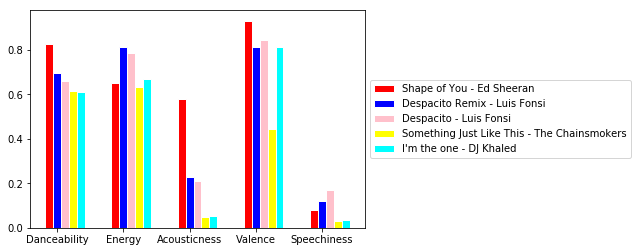

In [3]:
top_5 = song_df.head(5)

barWidth = 0.12
song1 = [0.825, 0.652, 0.581, 0.931, 0.0802]
song2 = [0.694, 0.815, 0.229, 0.813, 0.12]
song3 = [0.660, 0.786, 0.209, 0.846, 0.17]
song4 = [0.617, 0.635, 0.0498, 0.446, 0.0317]
song5 = [0.609, 0.668, 0.0552, 0.811, 0.0367]

r1 = np.arange(len(song1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, song1, color ='red', width=barWidth, edgecolor='white', label='Shape of You - Ed Sheeran')
plt.bar(r2, song2, color ='blue', width=barWidth, edgecolor='white', label='Despacito Remix - Luis Fonsi')
plt.bar(r3, song3, color ='pink', width=barWidth, edgecolor='white', label='Despacito - Luis Fonsi')
plt.bar(r4, song4, color ='yellow', width=barWidth, edgecolor='white', label='Something Just Like This - The Chainsmokers')
plt.bar(r5, song5, color ='cyan', width=barWidth, edgecolor='white', label="I'm the one - DJ Khaled")

plt.xticks([r + barWidth for r in range(len(song1))], ['Danceability','Energy','Acousticness','Valence', 'Speechiness'])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Based on the chart, we can determine the songs demonstrated high levels of danceability, energy, and valence, implying people liked songs that were upbeat, intense, positive, and envigorating. But what about others who enjoy music less hyper and more soothing.

# Clustering
* Use appropriate attributes that are of importance in determining recommendations

In [4]:
song = song_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','liveness',
                'valence','tempo']]
song.head(6)

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo
0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.0931,0.931,95.977
1,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.0924,0.813,88.931
2,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.1120,0.846,177.833
3,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.1640,0.446,103.019
4,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.1670,0.811,80.924
5,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.0976,0.400,150.020


## Run k-Means

In [5]:
X = song.values
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
print(kmeans.labels_)

[13  2  5  8  6  7 13 13  3  4 11 13 13 13  7 14 13  3  8 14  8  1  6  4
  9  0  8  3  2  4  2  5 13  9  0 13  0 11  9 12  2  9  8  8  2  6  6  8
 14  8  0  3 10 14  9  2 14 12  1  9  3  5 14  5  0  8  5  6  2  6  4 14
  3  9  8 12  2  0 14  3 13  2 14 11  2  2  3  2 12 12 14  4 12  8  6  3
 11 13  0  5]


In [7]:
song_names = song_df['name']
curr_song = 'Shape of You'
curr_song_ind = 0

# Determine index of song in dataframe
for i in range(0,len(song_df)):
    if (song_names[i] == curr_song):
        curr_song_ind = i   

In [8]:
list = []
for j in range(0, len(kmeans.labels_)):
    if ((j != curr_song_ind) and (kmeans.labels_[j] == kmeans.labels_[curr_song_ind])):
        list.append(j)

In [9]:
recommended_songs = []
for k in list:
    recommended_songs.append(song_names[k])
print (recommended_songs)

["It Ain't Me (with Selena Gomez)", 'Unforgettable', 'Paris', 'Stay (with Alessia Cara)', 'Attention', 'Swalla (feat. Nicki Minaj & Ty Dolla $ign)', 'Wild Thoughts', '1-800-273-8255', 'Starving', 'Body Like A Back Road']
